In [41]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
#from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt



patients = pd.read_csv("/Users/william/Desktop/Covid Project/finalDataCleanedNormalized.csv")


from sklearn.neighbors import KNeighborsClassifier

#from IPython.display import display

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
patients


,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,RENAL_CHRONIC,DATE_DIED,CLASIFFICATION_FINAL,ICU
0,0.0,0.0,0.0,0.347826,1.0,1.0,0.0,0.333333,1.0
1,0.0,0.0,1.0,0.321739,0.0,1.0,0.0,0.333333,1.0
2,0.0,0.0,1.0,0.217391,1.0,1.0,0.0,0.333333,1.0
3,0.0,0.0,0.0,0.695652,1.0,1.0,0.0,0.333333,0.0
4,0.0,0.0,0.0,0.504348,1.0,1.0,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...
76744,1.0,0.0,1.0,0.686957,1.0,1.0,0.0,1.000000,1.0
76745,1.0,0.0,0.0,0.530435,0.0,1.0,0.0,1.000000,1.0
76746,1.0,0.0,0.0,0.547826,1.0,1.0,0.0,1.000000,1.0
76747,1.0,0.0,1.0,0.200000,0.0,1.0,0.0,1.000000,1.0


/Users/william/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.5487025687834137


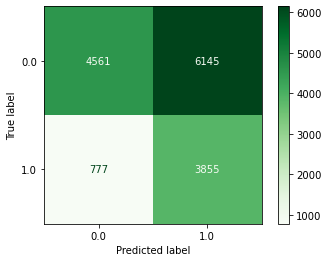

In [42]:
dep_var = "Death"
cond = np.random.rand(len(patients))>.2
train = np.where(cond)[0]
valid = np.where(~cond)[0]

len(train), len(valid)

train_df = patients.iloc[train]
valid_df = patients.iloc[valid]
len(train_df),len(valid_df)

train_y = train_df['DATE_DIED']
train_xs = train_df.drop(['DATE_DIED'],axis=1)

valid_y = valid_df['DATE_DIED']
valid_xs = valid_df.drop(['DATE_DIED'],axis=1)

m = KNeighborsClassifier()
m = m.fit(train_xs,train_y)

plot_confusion_matrix(estimator=m,X=valid_xs,y_true=valid_y,cmap=plt.cm.Greens)


std_score = m.score(valid_xs,valid_y)
print(std_score)



In [43]:
data = {'MEDICAL_UNIT':[0],'PATIENT_TYPE':[0],'PNEUMONIA':[0],'AGE':[0],'DIABETES':[0],'RENAL_CHRONIC':[0],'CLASIFFICATION_FINAL':[0],'ICU':[0]}
feat_imp = pd.DataFrame(data)
print(feat_imp.head())

   MEDICAL_UNIT  PATIENT_TYPE  PNEUMONIA  AGE  DIABETES  RENAL_CHRONIC  \
0             0             0          0    0         0              0   

   CLASIFFICATION_FINAL  ICU  
0                     0    0  


In [48]:


valid_MEDU = valid_xs.copy()
valid_MEDU['MEDICAL_UNIT'] = np.random.permutation(valid_MEDU['MEDICAL_UNIT'])
valid_MEDU.head()
m.score(valid_MEDU,valid_y)

feat_imp['MEDICAL_UNIT'] = std_score - m.score(valid_MEDU,valid_y)


valid_PAT = valid_xs.copy()
valid_PAT['PATIENT_TYPE'] = np.random.permutation(valid_PAT['PATIENT_TYPE'])
valid_PAT.head()
m.score(valid_PAT,valid_y)

feat_imp['PATIENT_TYPE'] = std_score - m.score(valid_PAT,valid_y)


valid_PNEUMONIA = valid_xs.copy()
valid_PNEUMONIA['PNEUMONIA'] = np.random.permutation(valid_PNEUMONIA['PNEUMONIA'])
valid_PNEUMONIA.head()
m.score(valid_PNEUMONIA,valid_y)

feat_imp['PNEUMONIA'] = std_score - m.score(valid_PNEUMONIA,valid_y)



valid_AGE= valid_xs.copy()
valid_AGE['AGE'] = np.random.permutation(valid_AGE['AGE'])
valid_AGE.head()
m.score(valid_AGE,valid_y)
feat_imp['AGE'] = std_score - m.score(valid_AGE,valid_y)


valid_DIABETES = valid_xs.copy()
valid_DIABETES['DIABETES'] = np.random.permutation(valid_DIABETES['DIABETES'])
valid_DIABETES.head()
m.score(valid_DIABETES,valid_y)

feat_imp['DIABETES'] = std_score - m.score(valid_DIABETES,valid_y)



valid_RENAL_CHRONIC = valid_xs.copy()
valid_RENAL_CHRONIC['RENAL_CHRONIC'] = np.random.permutation(valid_RENAL_CHRONIC['RENAL_CHRONIC'])
valid_RENAL_CHRONIC.head()
m.score(valid_RENAL_CHRONIC,valid_y)

feat_imp['RENAL_CHRONIC'] = std_score - m.score(valid_RENAL_CHRONIC,valid_y)


valid_CLASIFFICATION_FINAL = valid_xs.copy()
valid_CLASIFFICATION_FINAL['CLASIFFICATION_FINAL'] = np.random.permutation(valid_CLASIFFICATION_FINAL['CLASIFFICATION_FINAL'])
valid_CLASIFFICATION_FINAL.head()
m.score(valid_CLASIFFICATION_FINAL,valid_y)

feat_imp['CLASIFFICATION_FINAL'] = std_score - m.score(valid_CLASIFFICATION_FINAL,valid_y)



valid_ICU = valid_xs.copy()
valid_ICU['ICU'] = np.random.permutation(valid_ICU['ICU'])
valid_ICU.head()
m.score(valid_ICU,valid_y)

feat_imp['ICU'] = std_score - m.score(valid_ICU,valid_y)


feat_imp


,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU
0,0.011475,0.0,0.012714,0.036119,-0.012974,-0.005151,0.010692,-0.002282
